# Project 3: Web APIs & NLP (02_Data_Cleaning_EDA_Modeling)

##### To install Microsoft Visual C++ 14.0 or greater which is required for use of contractions library function

https://visualstudio.microsoft.com/thank-you-downloading-visual-studio/?sku=BuildTools&rel=16

##### Installation for contractions library

In [1]:
pip install contractions

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
import seaborn as sns
import datetime
import contractions
from datetime import datetime
from bs4 import BeautifulSoup
from nltk.tokenize import RegexpTokenizer
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from PIL import Image

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, roc_auc_score, plot_confusion_matrix

pd.set_option('display.max_colwidth', None)

## Data Cleaning and Pre-processing


### Data Cleaning

In [3]:
# Reading the CSV vegan_scraped.csv.
vegan_scraped = pd.read_csv("../data/vegan_scraped.csv")
# Reading the CSV keto_scraped.csv.
keto_scraped = pd.read_csv("../data/keto_scraped.csv")

In [4]:
#Return a tuple representing the dimensionality of the vegan_scraped.
vegan_scraped.shape

(1000, 11)

In [5]:
#Return a tuple representing the dimensionality of the keto_scraped.
keto_scraped.shape

(1000, 11)

In [6]:
#show vegan_scraped's information.
vegan_scraped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   subreddit              1000 non-null   object
 1   id                     1000 non-null   object
 2   author                 1000 non-null   object
 3   title                  1000 non-null   object
 4   selftext               1000 non-null   object
 5   subreddit_subscribers  1000 non-null   int64 
 6   created_utc            1000 non-null   int64 
 7   created_time           1000 non-null   object
 8   length_of_time(sec)    1000 non-null   int64 
 9   num_of_comments        1000 non-null   int64 
 10  score                  1000 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [7]:
#show keto_scraped's information.
keto_scraped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   subreddit              1000 non-null   object
 1   id                     1000 non-null   object
 2   author                 1000 non-null   object
 3   title                  1000 non-null   object
 4   selftext               1000 non-null   object
 5   subreddit_subscribers  1000 non-null   int64 
 6   created_utc            1000 non-null   int64 
 7   created_time           1000 non-null   object
 8   length_of_time(sec)    1000 non-null   int64 
 9   num_of_comments        1000 non-null   int64 
 10  score                  1000 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [8]:
# The "subreddit_subscribers" field shows how many subscribers are  subscribed to "vegan" subreddit based on scraped time.
vegan_subscribers = vegan_scraped['subreddit_subscribers'].max()
vegan_subscribers

592659

In [9]:
# The "subreddit_subscribers" field shows how many subscribers are  subscribed to "keto" subreddit based on scraped time.
keto_subscribers = keto_scraped['subreddit_subscribers'].max()
keto_subscribers

2372343

In [10]:
#Return the first number of rows.
vegan_scraped.head()

,subreddit,id,author,title,selftext,subreddit_subscribers,created_utc,created_time,length_of_time(sec),num_of_comments,score
0,vegan,mvvguj,Tytheboss16,"“If people still eat meat, they might as well get it from the right place” argument?","So I’ve got a friend who runs a small-scale (about 30 head), local, organic cattle operation. While the cows are still being raised for beef, they’re kept on grass their whole lives, never eat grain, calves are with mothers until going to butcher, and the animals are treated with (IMO) as much respect as possible, given the circumstances. My friend also uses a FDA/Organic (idk all the govt. terminology) approved butcher. Apparently, the butcher uses reduced-stress means of killing. My friend’s view on his role in society is this: if people still consume meat (and will do so for the foreseeable future), then they might as well get it from a good source (whatever the definition of “good” is). What are y’all’s opinions/thoughts on this ideology? \n\nNote: I’m not trying to force an argument/opinions on anyone, just thing to start a conversation. Also, if this question has already been posed, I apologize.",592659,1619058909,2021-04-22 10:35:09,4217,0,1
1,vegan,mvv6tv,Robert1_,"Hey, I'm a vegetarian that wants to take the next step. Any advice?","I've been mostly vegetarian since August last year I honestly never thought I would manage it I have been a major carnivore my entire life. Since trying to eat vegetarian I have realised how much dairy is in my diet, I'm basically substituting meat for it in most cases. Anyway, the shops that are within any reasonable distance to me have milk substitutes which I enjoy but little else. I'm thinking of shopping online are there any recommendations for cheese/butter replacements I should look at? Any general advice would be great too!",592650,1619057891,2021-04-22 10:18:11,5235,0,1
2,vegan,mvudcx,vanillust,WHY ARE THERE NON VEGAN ITEMS IN THE VEGAN SECTION!!!,"Basically I picked some vegan kimchi out of the vegan section from a brand that generally advertises itself as vegan. I then went back to the same section and brand and swapped flavors because i changed my mind and wanted a spicier flavor. I didnt check the new flavors label. (Big mistake on my end apparently) I went home and made some ramen and added the kimchi, ate it, and then checked the label to see how much alcohol from fermentation there was in the product. (im on a strict no alcohol medication) Anyway I see shrimp and anchovy sauce listed as ingredients!!!! What the F***!!!!! Ive been throwing up my dinner for over 30 minutes now because I cant get the thought of dead baby shrimp and anchovy’s in my body out of my head. How is this even allowed!!!!!! Never again will i not check a label. :( (Sorry if this is semi incoherent Im typing this in a sick fit of rage)",592642,1619054980,2021-04-22 09:29:40,8146,0,1
3,vegan,mvu5a1,GlassRockets,Best tasting vegan protein powder?,"I'm actually a vegetarian and my all time favorite protein powder is gold standard casein in the flavor chocolate supreme (I blend it with water and add salt) because it literally tastes like hot chocolate and I genuinely look forward to having my daily shakes, however I'm trying to cut back on dairy and so far have tried around 8 different protein powders, it seems like delicious vegan protein powders are few and far between. What are the best tasting ones?",592637,1619054160,2021-04-22 09:16:00,8966,0,1
4,vegan,mvtesg,fixFriendship,Where do I get my proteins if I workout?,"I want to transition from lacto-ovo vegetarian into vegan, but I am worried about where I will get my proteins without using complements.\n\nAs I workout quite often, my diet requires a strong presence of rich-in-protein (dairy) products -these are especial products with a few more proteins than normal-, and I would like to stop consuming those, but I do not wish to substitute them at the cost of having to buy expensive, often unhealthy, protein powders. \

In [11]:
#Return the first number of rows.
keto_scraped.head()

,subreddit,id,author,title,selftext,subreddit_subscribers,created_utc,created_time,length_of_time(sec),num_of_comments,score
0,keto,mvvh65,freddyt55555,Allulose is amazing!,"Guys, I'm not kidding. It's like a fucking natural miracle drug.\n\nAbout a month ago, I posted about how allulose is like [Ex-Lax](https://www.reddit.com/r/keto/comments/mbiksm/allulose_better_than_exlax/?utm_source=share&amp;utm_medium=web2x&amp;context=3). I stopped using it for a while, but I recently found out that not only does it not spike your blood glucose, it can actually make your blood glucose [go down](https://www.reddit.com/r/diabetes_t2/comments/mtic7m/eating_fruits_with_allulose/?utm_source=share&amp;utm_medium=web2x&amp;context=3). I'm not the only one who's experienced [this](https://www.reddit.com/r/diabetes_t2/comments/mv9djm/allulose_what_the_heck_is_going_on/?utm_source=share&amp;utm_medium=web2x&amp;context=3).\n\nI found out that the Ex-Lax effect is basically the allulose blocking the metabolism of certain carbohydrates. Here's an excerpt from the Wikipedia [article](https://en.wikipedia.org/wiki/Psicose):\n\n&gt;Allulose is a weak inhibitor of the enzymes α-glucosidase, α-amylase, maltase, and sucrase.\[2\] Because of this, it can inhibit the metabolism of starch and disaccharides into monosaccharides in the gastrointestinal tract.\[2\] Additionally, allulose inhibits the absorption of glucose via transporters in the intestines.\[2\] For these reasons, allulose has potential antihyperglycemic effects, and has been found to reduce postprandial hyperglycemia in humans.\[2\]\[9\]\n\nNo only does it block metabolism of carbs, it can lower cholesterol (if you care about such trivialities, that is):\n\n&gt;Through modulation of lipogenic enzymes in the liver, allulose may also have antihyperlipidemic effects.\[2\]\[9\]\n\nThe 2nd link above cites a bunch of studies of the antihyperglycemic effects of allulose, but there's another study that shows that it can protect the [beta cells](https://www.researchgate.net/publication/230644405_Rare_sugar_D-psicose_protects_pancreas_b-islets_and_thus_improves_insulin_resistance_in_OLETF_rats) in the pancreas as well.",2372343,1619058942,2021-04-22 10:35:42,4702,0,1
1,keto,mvuulx,beenroasted,Here we go again.,"I formerly weighed 435 lbs and I lost 125 eating ketogenically for two years. I felt great, I was motivated in all aspects of life, but I did it for the wrong reasons. I did it because I hated myself. The day I started keto I remember the conversation I had with myself. I was severely depressed, I was ready to take drastic action in the worst way. I decided to try one last thing I would cut out everything I thought I loved - friends, Taco Bell, video games. I thought the only way to get myself to move forward was to torture myself. And I did it for two years. The results were amazing and I felt the best I ever felt but I also had the lingering sense of despair and self loathing. I gained all the weight back over the next two years and then some. I gave up on myself, I didn’t see the value of me being around. I was living in filth, I smelt bad, my hair was stupid long. I was a total embarrassment only bringing myself together to go work and even then minimal effort. \n\nI’m back. Two weeks ago I decided to go back to keto for me. Because I want better, because I want to be around. I want to not be embarrassed of myself when I walk into a room, or down a street or looking in the mirror. I want to not worry about having a heart attack and dying leaving behind loved ones. Some of the people I hold dearest to my heart try to convince me to get the surgery. But I already learned the hard way that it isn’t just the weight and that it was the mentality I’ve lived with for the last 15 years. I need to break that mentality and the only way for me to do it is to work through it with the right mindset. \n\nI’m starting at what I would guess is 475 lbs. I know I already lost weight but I don’t have a scale

In [12]:
vegan_scraped[['created_time']].describe()

,created_time
count,1000
unique,1000
top,2021-04-01 15:20:25
freq,1


In [13]:
keto_scraped[['created_time']].describe()

,created_time
count,1000
unique,993
top,2021-03-30 18:00:11
freq,2


In [14]:
# Defining a function to merge title and selftext columns and return the combined string.
def merged_text(row):
    return row['title']+" "+row['selftext']

# Applying the function on all rows of both dataframes.
vegan_scraped['text'] = vegan_scraped.apply(merged_text, axis=1)
keto_scraped['text'] = keto_scraped.apply(merged_text, axis=1)

In [15]:
# Defining a function to check the number of text of the post based on the english text(sepearte by space)
def length_of_post(text):
    text = text.strip().split(" ")
    return len(text)

# Mapping the above defined funtion on 'all_text' column to create a new column.
vegan_scraped['post_length'] = vegan_scraped['text'].map(length_of_post)
keto_scraped['post_length'] = keto_scraped['text'].map(length_of_post)

In [16]:
vegan_scraped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   subreddit              1000 non-null   object
 1   id                     1000 non-null   object
 2   author                 1000 non-null   object
 3   title                  1000 non-null   object
 4   selftext               1000 non-null   object
 5   subreddit_subscribers  1000 non-null   int64 
 6   created_utc            1000 non-null   int64 
 7   created_time           1000 non-null   object
 8   length_of_time(sec)    1000 non-null   int64 
 9   num_of_comments        1000 non-null   int64 
 10  score                  1000 non-null   int64 
 11  text                   1000 non-null   object
 12  post_length            1000 non-null   int64 
dtypes: int64(6), object(7)
memory usage: 101.7+ KB


In [17]:
# To verify the added columns
vegan_scraped.head()


,subreddit,id,author,title,selftext,subreddit_subscribers,created_utc,created_time,length_of_time(sec),num_of_comments,score,text,post_length
0,vegan,mvvguj,Tytheboss16,"“If people still eat meat, they might as well get it from the right place” argument?","So I’ve got a friend who runs a small-scale (about 30 head), local, organic cattle operation. While the cows are still being raised for beef, they’re kept on grass their whole lives, never eat grain, calves are with mothers until going to butcher, and the animals are treated with (IMO) as much respect as possible, given the circumstances. My friend also uses a FDA/Organic (idk all the govt. terminology) approved butcher. Apparently, the butcher uses reduced-stress means of killing. My friend’s view on his role in society is this: if people still consume meat (and will do so for the foreseeable future), then they might as well get it from a good source (whatever the definition of “good” is). What are y’all’s opinions/thoughts on this ideology? \n\nNote: I’m not trying to force an argument/opinions on anyone, just thing to start a conversation. Also, if this question has already been posed, I apologize.",592659,1619058909,2021-04-22 10:35:09,4217,0,1,"“If people still eat meat, they might as well get it from the right place” argument? So I’ve got a friend who runs a small-scale (about 30 head), local, organic cattle operation. While the cows are still being raised for beef, they’re kept on grass their whole lives, never eat grain, calves are with mothers until going to butcher, and the animals are treated with (IMO) as much respect as possible, given the circumstances. My friend also uses a FDA/Organic (idk all the govt. terminology) approved butcher. Apparently, the butcher uses reduced-stress means of killing. My friend’s view on his role in society is this: if people still consume meat (and will do so for the foreseeable future), then they might as well get it from a good source (whatever the definition of “good” is). What are y’all’s opinions/thoughts on this ideology? \n\nNote: I’m not trying to force an argument/opinions on anyone, just thing to start a conversation. Also, if this question has already been posed, I apologize.",175
1,vegan,mvv6tv,Robert1_,"Hey, I'm a vegetarian that wants to take the next step. Any advice?","I've been mostly vegetarian since August last year I honestly never thought I would manage it I have been a major carnivore my entire life. Since trying to eat vegetarian I have realised how much dairy is in my diet, I'm basically substituting meat for it in most cases. Anyway, the shops that are within any reasonable distance to me have milk substitutes which I enjoy but little else. I'm thinking of shopping online are there any recommendations for cheese/butter replacements I should look at? Any general advice would be great too!",592650,1619057891,2021-04-22 10:18:11,5235,0,1,"Hey, I'm a vegetarian that wants to take the next step. Any advice? I've been mostly vegetarian since August last year I honestly never thought I would manage it I have been a major carnivore my entire life. Since trying to eat vegetarian I have realised how much dairy is in my diet, I'm basically substituting meat for it in most cases. Anyway, the shops that are within any reasonable distance to me have milk substitutes which I enjoy but little else. I'm thinking of shopping online are there any recommendations for cheese/butter replacements I should look at? Any general advice would be great too!",105
2,vegan,mvudcx,vanillust,WHY ARE THERE NON VEGAN ITEMS IN THE VEGAN SECTION!!!,"Basically I picked some vegan kimchi out of the vegan section from a brand that generally advertises itself as vegan. I then went back to the same section and brand and swapped flavors because i changed my mind and wanted a spicier flavor. I didnt check the new flavors label. (Big mistake on my end apparently) I went home and made some ramen and added the kimchi, ate it, and then checked the label 

In [18]:
# To verify the added columns
keto_scraped.head()

,subreddit,id,author,title,selftext,subreddit_subscribers,created_utc,created_time,length_of_time(sec),num_of_comments,score,text,post_length
0,keto,mvvh65,freddyt55555,Allulose is amazing!,"Guys, I'm not kidding. It's like a fucking natural miracle drug.\n\nAbout a month ago, I posted about how allulose is like [Ex-Lax](https://www.reddit.com/r/keto/comments/mbiksm/allulose_better_than_exlax/?utm_source=share&amp;utm_medium=web2x&amp;context=3). I stopped using it for a while, but I recently found out that not only does it not spike your blood glucose, it can actually make your blood glucose [go down](https://www.reddit.com/r/diabetes_t2/comments/mtic7m/eating_fruits_with_allulose/?utm_source=share&amp;utm_medium=web2x&amp;context=3). I'm not the only one who's experienced [this](https://www.reddit.com/r/diabetes_t2/comments/mv9djm/allulose_what_the_heck_is_going_on/?utm_source=share&amp;utm_medium=web2x&amp;context=3).\n\nI found out that the Ex-Lax effect is basically the allulose blocking the metabolism of certain carbohydrates. Here's an excerpt from the Wikipedia [article](https://en.wikipedia.org/wiki/Psicose):\n\n&gt;Allulose is a weak inhibitor of the enzymes α-glucosidase, α-amylase, maltase, and sucrase.\[2\] Because of this, it can inhibit the metabolism of starch and disaccharides into monosaccharides in the gastrointestinal tract.\[2\] Additionally, allulose inhibits the absorption of glucose via transporters in the intestines.\[2\] For these reasons, allulose has potential antihyperglycemic effects, and has been found to reduce postprandial hyperglycemia in humans.\[2\]\[9\]\n\nNo only does it block metabolism of carbs, it can lower cholesterol (if you care about such trivialities, that is):\n\n&gt;Through modulation of lipogenic enzymes in the liver, allulose may also have antihyperlipidemic effects.\[2\]\[9\]\n\nThe 2nd link above cites a bunch of studies of the antihyperglycemic effects of allulose, but there's another study that shows that it can protect the [beta cells](https://www.researchgate.net/publication/230644405_Rare_sugar_D-psicose_protects_pancreas_b-islets_and_thus_improves_insulin_resistance_in_OLETF_rats) in the pancreas as well.",2372343,1619058942,2021-04-22 10:35:42,4702,0,1,"Allulose is amazing! Guys, I'm not kidding. It's like a fucking natural miracle drug.\n\nAbout a month ago, I posted about how allulose is like [Ex-Lax](https://www.reddit.com/r/keto/comments/mbiksm/allulose_better_than_exlax/?utm_source=share&amp;utm_medium=web2x&amp;context=3). I stopped using it for a while, but I recently found out that not only does it not spike your blood glucose, it can actually make your blood glucose [go down](https://www.reddit.com/r/diabetes_t2/comments/mtic7m/eating_fruits_with_allulose/?utm_source=share&amp;utm_medium=web2x&amp;context=3). I'm not the only one who's experienced [this](https://www.reddit.com/r/diabetes_t2/comments/mv9djm/allulose_what_the_heck_is_going_on/?utm_source=share&amp;utm_medium=web2x&amp;context=3).\n\nI found out that the Ex-Lax effect is basically the allulose blocking the metabolism of certain carbohydrates. Here's an excerpt from the Wikipedia [article](https://en.wikipedia.org/wiki/Psicose):\n\n&gt;Allulose is a weak inhibitor of the enzymes α-glucosidase, α-amylase, maltase, and sucrase.\[2\] Because of this, it can inhibit the metabolism of starch and disaccharides into monosaccharides in the gastrointestinal tract.\[2\] Additionally, allulose inhibits the absorption of glucose via transporters in the intestines.\[2\] For these reasons, allulose has potential antihyperglycemic effects, and has been found to reduce postprandial hyperglycemia in humans.\[2\]\[9\]\n\nNo only does it block metabolism of carbs, it can lower cholesterol (if you care about such trivialities, that is):\n\n&gt;Through modulation of lipogenic enzymes in the liver, allulose may also have antihyperlipidemic effects.\[2\]\[9\]\n\nThe 2nd link above cites a bunch of studies of the antihyp

- Checking for Duplicates

In [19]:
print("Before drop duplicate for vegan_scraped: "+str(vegan_scraped.shape))
# Dropping all duplicate posts using the 'id' column as the unique identifier.
vegan_scraped.drop_duplicates(subset='id', keep='last', ignore_index=True, inplace=True)
print("After drop duplicate for vegan_scraped:: "+str(vegan_scraped.shape))

Before drop duplicate for vegan_scraped: (1000, 13)
After drop duplicate for vegan_scraped:: (1000, 13)


In [20]:
print("Before drop duplicate for keto_scraped: "+str(keto_scraped.shape))
# Dropping all duplicate posts using the 'id' column as the unique identifier.
vegan_scraped.drop_duplicates(subset='id', keep='last', ignore_index=True, inplace=True)
print("After drop duplicate for keto_scraped:: "+str(keto_scraped.shape))

Before drop duplicate for keto_scraped: (1000, 13)
After drop duplicate for keto_scraped:: (1000, 13)


### Text Clean Function
To clean text column based on the following execution :

1. To remove any and all HTML artefacts
2. To expend all contractions
3. To remove all numbers, punctuations and special characters (keep '-' only).
4. To lowercase
5. To tokenize english words except one or more ('+', \w' and'-').
6. To remove stopwords using the english stopwords list from nltk.corpus.
7. To remove subreddit name from text (to avoid target leakage).
8. To stem the text using PorterStemmer

In [21]:
# fuction to clean the text
def clean_text(text_raw):
    # To remove any and all HTML artefacts
    text_no_html = BeautifulSoup(text_raw).get_text()
    # To expend all contractions
    text_expend_contractions = contractions.fix(text_no_html)
    # To remove all numbers, punctuations and special characters (keep '-' only).
    text_no_punc = re.sub(r'[^A-Za-z\-\s]', ' ', text_expend_contractions)
    # To lowercase
    text_to_lower=text_no_punc.lower()
    # To tokenize english words except one or more ('+', \w' and'-').
    text_tokens_list = RegexpTokenizer(r'[\w\-]+').tokenize(text_to_lower)
    # To remove stopwords using the english stopwords list from nltk.corpus.
    text_stopwords_removed = [word for word in text_tokens_list if word not in set(stopwords.words('english'))]
    # To remove subreddit name from text (to avoid target leakage).
    text_remove_subreddit = [word for word in text_stopwords_removed if word not in set(['vegan', 'keto'])]
    # To stem the text using PorterStemmer
    text_stemmed = [PorterStemmer().stem(word) for word in text_remove_subreddit]
    return " ".join(text_stemmed)

In [22]:
# To add cleaned text into 'text_cleaned' field into both vagan_scraped and keto_scraped 
vegan_clean_text = []
keto_clean_text = []

print("\nCleaning posts from Vegan Scraped Post\n")
counter = 0
for i, post in enumerate(vegan_scraped['text']):
    
    vegan_clean_text.append(clean_text(post))
    
    counter += 1
    if counter % 100 == 0:
        print(f"{counter} posts cleaned.")
        
print(f"\nAll {vegan_scraped.shape[0]} posts from Vegan cleaned.")

vegan_scraped['text_cleaned'] = vegan_clean_text

print("\nCleaning posts from Keto Scraped Post\n")

counter = 0
for i, post in enumerate(keto_scraped['text']):
    
    keto_clean_text.append(clean_text(post))
    
    counter += 1
    if counter % 100 == 0:
        print(f"{counter} posts cleaned.")
        
print(f"\nAll {keto_scraped.shape[0]} posts from Keto cleaned.")

keto_scraped['text_cleaned'] = keto_clean_text


Cleaning posts from Vegan Scraped Post

100 posts cleaned.
200 posts cleaned.
300 posts cleaned.
400 posts cleaned.
500 posts cleaned.
600 posts cleaned.
700 posts cleaned.
800 posts cleaned.
900 posts cleaned.
1000 posts cleaned.

All 1000 posts from Vegan cleaned.

Cleaning posts from Keto Scraped Post

100 posts cleaned.
200 posts cleaned.
300 posts cleaned.
400 posts cleaned.
500 posts cleaned.
600 posts cleaned.
700 posts cleaned.
800 posts cleaned.
900 posts cleaned.
1000 posts cleaned.

All 1000 posts from Keto cleaned.


In [23]:
# to view the top 5 posts in vegan_scraped
vegan_scraped.head()

,subreddit,id,author,title,selftext,subreddit_subscribers,created_utc,created_time,length_of_time(sec),num_of_comments,score,text,post_length,text_cleaned
0,vegan,mvvguj,Tytheboss16,"“If people still eat meat, they might as well get it from the right place” argument?","So I’ve got a friend who runs a small-scale (about 30 head), local, organic cattle operation. While the cows are still being raised for beef, they’re kept on grass their whole lives, never eat grain, calves are with mothers until going to butcher, and the animals are treated with (IMO) as much respect as possible, given the circumstances. My friend also uses a FDA/Organic (idk all the govt. terminology) approved butcher. Apparently, the butcher uses reduced-stress means of killing. My friend’s view on his role in society is this: if people still consume meat (and will do so for the foreseeable future), then they might as well get it from a good source (whatever the definition of “good” is). What are y’all’s opinions/thoughts on this ideology? \n\nNote: I’m not trying to force an argument/opinions on anyone, just thing to start a conversation. Also, if this question has already been posed, I apologize.",592659,1619058909,2021-04-22 10:35:09,4217,0,1,"“If people still eat meat, they might as well get it from the right place” argument? So I’ve got a friend who runs a small-scale (about 30 head), local, organic cattle operation. While the cows are still being raised for beef, they’re kept on grass their whole lives, never eat grain, calves are with mothers until going to butcher, and the animals are treated with (IMO) as much respect as possible, given the circumstances. My friend also uses a FDA/Organic (idk all the govt. terminology) approved butcher. Apparently, the butcher uses reduced-stress means of killing. My friend’s view on his role in society is this: if people still consume meat (and will do so for the foreseeable future), then they might as well get it from a good source (whatever the definition of “good” is). What are y’all’s opinions/thoughts on this ideology? \n\nNote: I’m not trying to force an argument/opinions on anyone, just thing to start a conversation. Also, if this question has already been posed, I apologize.",175,peopl still eat meat might well get right place argument got friend run small-scal head local organ cattl oper cow still rais beef kept grass whole live never eat grain calv mother go butcher anim treat go much respect possibl given circumst friend also use fda organ idk govt terminolog approv butcher appar butcher use reduced-stress mean kill friend view role societi peopl still consum meat forese futur might well get good sourc whatev definit good opinion thought ideolog note tri forc argument opinion anyon thing start convers also question alreadi pose apolog
1,vegan,mvv6tv,Robert1_,"Hey, I'm a vegetarian that wants to take the next step. Any advice?","I've been mostly vegetarian since August last year I honestly never thought I would manage it I have been a major carnivore my entire life. Since trying to eat vegetarian I have realised how much dairy is in my diet, I'm basically substituting meat for it in most cases. Anyway, the shops that are within any reasonable distance to me have milk substitutes which I enjoy but little else. I'm thinking of shopping online are there any recommendations for cheese/butter replacements I should look at? Any general advice would be great too!",592650,1619057891,2021-04-22 10:18:11,5235,0,1,"Hey, I'm a vegetarian that wants to take the next step. Any advice? I've been mostly vegetarian since August last year I honestly never thought I would manage it I have been a major carnivore my entire life. Since trying to eat vegetarian I have realised how much dairy is in my diet, I'm basically substituting meat for it in most cases. Anyway, the shops that are within any reasonable distance to me have milk substitutes which I enjoy but little else. I'm thinking of shopping online are there any recommen

In [24]:
# to view the top 5 posts in keto_scraped
keto_scraped.head()

,subreddit,id,author,title,selftext,subreddit_subscribers,created_utc,created_time,length_of_time(sec),num_of_comments,score,text,post_length,text_cleaned
0,keto,mvvh65,freddyt55555,Allulose is amazing!,"Guys, I'm not kidding. It's like a fucking natural miracle drug.\n\nAbout a month ago, I posted about how allulose is like [Ex-Lax](https://www.reddit.com/r/keto/comments/mbiksm/allulose_better_than_exlax/?utm_source=share&amp;utm_medium=web2x&amp;context=3). I stopped using it for a while, but I recently found out that not only does it not spike your blood glucose, it can actually make your blood glucose [go down](https://www.reddit.com/r/diabetes_t2/comments/mtic7m/eating_fruits_with_allulose/?utm_source=share&amp;utm_medium=web2x&amp;context=3). I'm not the only one who's experienced [this](https://www.reddit.com/r/diabetes_t2/comments/mv9djm/allulose_what_the_heck_is_going_on/?utm_source=share&amp;utm_medium=web2x&amp;context=3).\n\nI found out that the Ex-Lax effect is basically the allulose blocking the metabolism of certain carbohydrates. Here's an excerpt from the Wikipedia [article](https://en.wikipedia.org/wiki/Psicose):\n\n&gt;Allulose is a weak inhibitor of the enzymes α-glucosidase, α-amylase, maltase, and sucrase.\[2\] Because of this, it can inhibit the metabolism of starch and disaccharides into monosaccharides in the gastrointestinal tract.\[2\] Additionally, allulose inhibits the absorption of glucose via transporters in the intestines.\[2\] For these reasons, allulose has potential antihyperglycemic effects, and has been found to reduce postprandial hyperglycemia in humans.\[2\]\[9\]\n\nNo only does it block metabolism of carbs, it can lower cholesterol (if you care about such trivialities, that is):\n\n&gt;Through modulation of lipogenic enzymes in the liver, allulose may also have antihyperlipidemic effects.\[2\]\[9\]\n\nThe 2nd link above cites a bunch of studies of the antihyperglycemic effects of allulose, but there's another study that shows that it can protect the [beta cells](https://www.researchgate.net/publication/230644405_Rare_sugar_D-psicose_protects_pancreas_b-islets_and_thus_improves_insulin_resistance_in_OLETF_rats) in the pancreas as well.",2372343,1619058942,2021-04-22 10:35:42,4702,0,1,"Allulose is amazing! Guys, I'm not kidding. It's like a fucking natural miracle drug.\n\nAbout a month ago, I posted about how allulose is like [Ex-Lax](https://www.reddit.com/r/keto/comments/mbiksm/allulose_better_than_exlax/?utm_source=share&amp;utm_medium=web2x&amp;context=3). I stopped using it for a while, but I recently found out that not only does it not spike your blood glucose, it can actually make your blood glucose [go down](https://www.reddit.com/r/diabetes_t2/comments/mtic7m/eating_fruits_with_allulose/?utm_source=share&amp;utm_medium=web2x&amp;context=3). I'm not the only one who's experienced [this](https://www.reddit.com/r/diabetes_t2/comments/mv9djm/allulose_what_the_heck_is_going_on/?utm_source=share&amp;utm_medium=web2x&amp;context=3).\n\nI found out that the Ex-Lax effect is basically the allulose blocking the metabolism of certain carbohydrates. Here's an excerpt from the Wikipedia [article](https://en.wikipedia.org/wiki/Psicose):\n\n&gt;Allulose is a weak inhibitor of the enzymes α-glucosidase, α-amylase, maltase, and sucrase.\[2\] Because of this, it can inhibit the metabolism of starch and disaccharides into monosaccharides in the gastrointestinal tract.\[2\] Additionally, allulose inhibits the absorption of glucose via transporters in the intestines.\[2\] For these reasons, allulose has potential antihyperglycemic effects, and has been found to reduce postprandial hyperglycemia in humans.\[2\]\[9\]\n\nNo only does it block metabolism of carbs, it can lower cholesterol (if you care about such trivialities, that is):\n\n&gt;Through modulation of lipogenic enzymes in the liver, allulose may also have antihyperlipidemic effects.\[2\]\[9\]\n\nThe 2nd link above cites a bunch of studies o

### Exploratory Data Analysis (EDA)

After cleaning the two subreddit datasets, the EDA process will be conducted to get a better understanding of the two subreddits and their posts before classification modeling


#### No. of Subscribers 

- Checking for Subscriber comparisons between subreddits 

In [25]:
if (vegan_scraped['created_utc'].max()>=keto_scraped['created_utc'].max()):
    print("No. of subscribers at " + str(vegan_scraped['created_utc'].max())+":")
else:
    print("No. of subscribers at " + str(keto_scraped['created_utc'].max())+":")
    
print(f"subreddit vegan\t= {vegan_subscribers}")
print(f"subreddit keto \t= {keto_subscribers}")

print(f"\nSubreddit vegan only has {round(vegan_subscribers/keto_subscribers*100, 2)}% of subscribers as compared to no. of subscribers of subreddit keto.")

No. of subscribers at 1619058942:
subreddit vegan	= 592659
subreddit keto 	= 2372343

Subreddit vegan only has 24.98% of subscribers as compared to no. of subscribers of subreddit keto.


From the above data, ***the subreddit of r/keto is more active than r/vegan***. The no. of subscribers in subreddit Keto are higher by about 4 times than the no. of subscribers in subreddit vegan.

#### Average and Range of Post Length

In [26]:
# Statistics of Length of Post in both vegan and 

vegan_mean_post_length = vegan_scraped['post_length'].mean()
keto_mean_post_length = keto_scraped['post_length'].mean()

print("Average length of posts:")
print(f"r/vegan \t= {round(vegan_mean_post_length, 2)} words")
print(f"r/keto \t\t= {round(keto_mean_post_length, 2)} words")
print()

#print("Range of length of posts:")
#print(f"r/vegan \t= {vegan_scraped['post_length'].min()} - {vegan_scraped['post_length'].max()} words")
#print(f"r/keto \t\t= {keto_scraped['post_length'].min()} - {keto_scraped['post_length'].max()} words")
#print()

Average length of posts:
r/vegan 	= 159.93 words
r/keto 		= 155.82 words



- This shows that even though keto has more subscribers, the average length of posts are relatively similar for both keto and vegan

#### Plotting scatterplot based on the length of posts

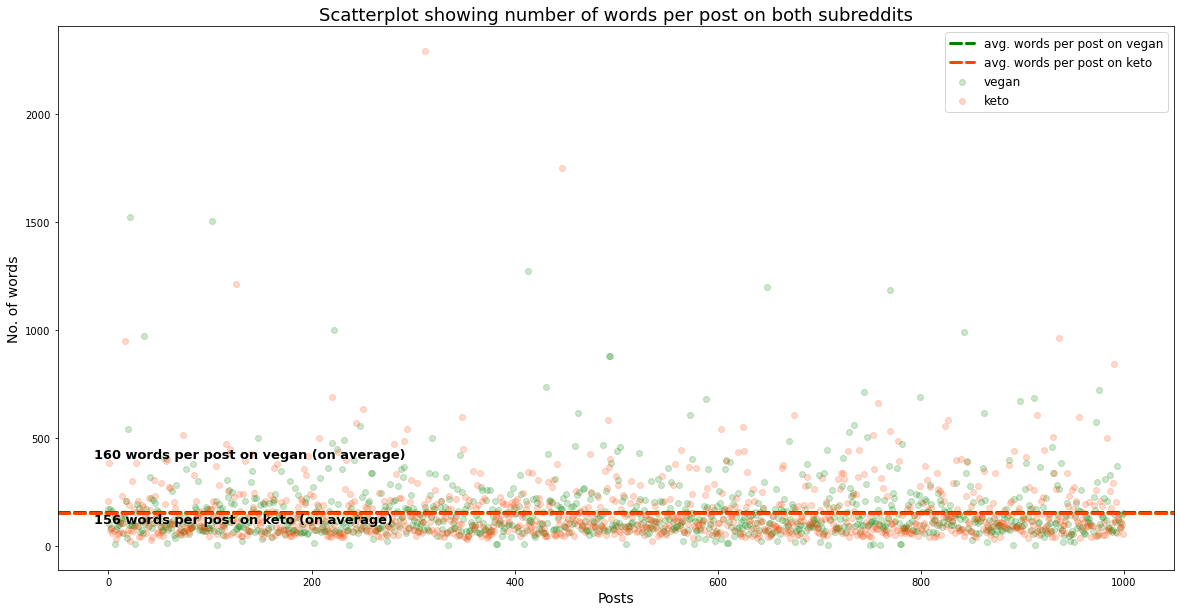

In [27]:
# Plotting scatterplot to show no. of words per post on both subreddits.

fig, ax = plt.subplots(figsize=(20,10))

plt.scatter(vegan_scraped.index, vegan_scraped['post_length'], color='Green', alpha=0.2, label='vegan')
plt.scatter(keto_scraped.index, keto_scraped['post_length'], color='Orangered', alpha=0.2, label='keto')

# Plotting horizontal lines to show average no. of words for posts in both subreddits.
plt.axhline(vegan_mean_post_length,
            label='avg. words per post on vegan',
            ls='--',
            linewidth=3,
            color='Green',
            dash_capstyle='round',
           )
plt.figtext(x=0.15,
            y=0.28,
            s=f"{int(round(vegan_mean_post_length, 0))} words per post on vegan (on average)",
            fontsize=13,
            fontweight='semibold'
           )

plt.axhline(keto_mean_post_length,
            label='avg. words per post on keto',
            ls='--',
            linewidth=3,
            color='Orangered',
            dash_capstyle='round',
           )
plt.figtext(x=0.15,
            y=0.19,
            s=f"{int(round(keto_mean_post_length, 0))} words per post on keto (on average)",
            fontsize=13,
            fontweight='semibold'
           )


plt.legend(fontsize=12)

plt.xlabel("Posts", fontsize=14)
plt.ylabel("No. of words", fontsize=14)

plt.title("Scatterplot showing number of words per post on both subreddits", loc='center', fontsize=18)

# Exporting plot image in PNG format.
plt.savefig('../plot_images/scatterplot_words_per_post.png', bbox_inches='tight');

Based on the analysis above, ***Both subreddits, vegan and keto has similar length per post***
159 words per post on vegan as compared to 156 words per post on keto. This may not be the significant impact on building classification model.

#### No. of Comments per post

In [28]:
# Checking mean number of comments for each post.

vegan_mean_comments = vegan_scraped['num_of_comments'].mean()
keto_mean_comments = keto_scraped['num_of_comments'].mean()

print("Average no. of comments per post:")
print(f"r/vegan \t= {round(vegan_mean_comments, 2)}")
print(f"r/keto \t\t= {round(keto_mean_comments, 2)}")
print()

Average no. of comments per post:
r/vegan 	= 14.54
r/keto 		= 18.02



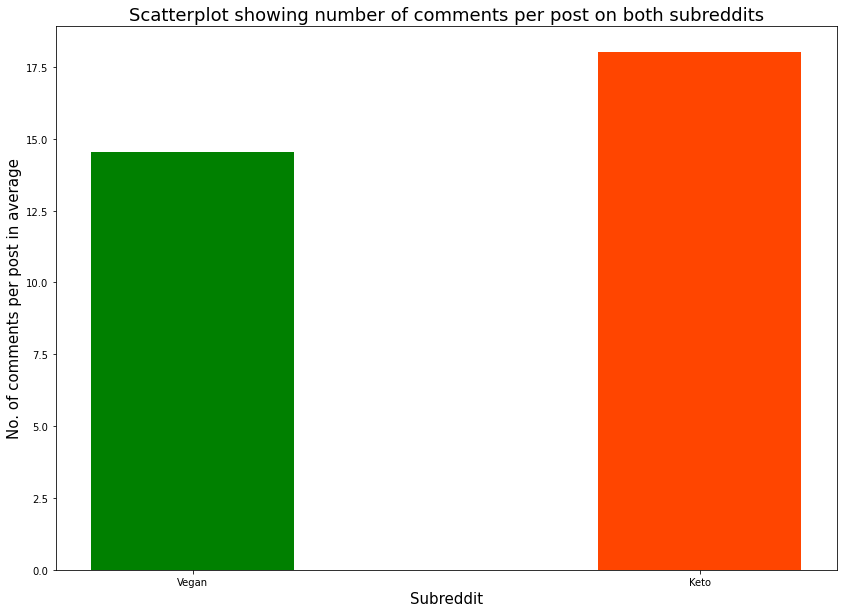

In [29]:
# creating the dataset
fig, ax = plt.subplots(figsize=(14,10))
# creating the bar plot

plt.bar("Vegan", vegan_mean_comments, color ='Green',
        width = 0.4)
plt.bar("Keto", keto_mean_comments, color ='Orangered',
        width = 0.4)
 
plt.xlabel("Subreddit", fontsize=15)
plt.ylabel("No. of comments per post in average", fontsize=15)
plt.title("Scatterplot showing number of comments per post on both subreddits", loc='center', fontsize=18)
plt.show()

As seen above, ***the no. of comments for subreddit vegan are slightly lesser than the no. of comments for  keto***
Vegan has 14 comments per post while Keto has 18 comments per post, same as difference in subscribers for both subreddits, this may indicate that the people show more interest on keto than vegan.

#### No. of posts created over time.

In [30]:
#conversion string object to data object
vegan_scraped['created_utc'] = vegan_scraped['created_utc'].map(lambda ts: datetime.fromtimestamp(ts))
keto_scraped['created_utc'] = keto_scraped['created_utc'].map(lambda ts: datetime.fromtimestamp(ts))

In [31]:
# Printing a summary statement about activity on both subreddits.


# Timespan between creation of latest post scraped and earliest post scraped .
# Converting 'created_utc' column from epoch time to datetime object.
# Separating no. of hours and minutes from timespans calculated above.

vegan_time_diff =vegan_scraped['created_utc'].max() - vegan_scraped['created_utc'].min()
vegan_time_diff_d = vegan_time_diff.days
vegan_time_diff_h = (vegan_time_diff.seconds//3600)
#vegan_time_diff_m = round((vegan_time_diff.seconds%3600)/60)


keto_time_diff = keto_scraped['created_utc'].max() - keto_scraped['created_utc'].min()
keto_time_diff_d = keto_time_diff.days
keto_time_diff_h = (keto_time_diff.seconds//3600)
#keto_time_diff_m = round((keto_time_diff.seconds%3600)/60)


# Changing format of timestamps of earliest and latest scraped posts.
vegan_time_start = vegan_scraped['created_utc'].min().strftime('%d %b %Y %I:%M %p')
vegan_time_end = vegan_scraped['created_utc'].max().strftime('%d %b %Y %I:%M %p')

keto_time_start = keto_scraped['created_utc'].min().strftime('%d %b %Y %I:%M %p')
keto_time_end = keto_scraped['created_utc'].max().strftime('%d %b %Y %I:%M %p')


# Printing the summary statement.
print("No. of unique posts created in given timespan:")
print(f"vegan : {vegan_scraped.shape[0]} posts within {vegan_time_diff_d} days {vegan_time_diff_h} hours (from {vegan_time_start} to {vegan_time_end})")
print(f"keto : \t{keto_scraped.shape[0]}  posts within {keto_time_diff_d} days {keto_time_diff_h} hours (from {keto_time_start} to {keto_time_end})")
print()

# Calculating average no. of posts created per hour.

vegan_avg_posts = vegan_scraped.shape[0] /vegan_time_diff.days 
keto_avg_posts = keto_scraped.shape[0] /keto_time_diff.days

print("Average no. of posts created per day:")
print(f"vegan \t= {round(vegan_avg_posts, 2)}")
print(f"keto \t= {round(keto_avg_posts, 2)}")
print()

No. of unique posts created in given timespan:
vegan : 1000 posts within 25 days 6 hours (from 28 Mar 2021 04:23 AM to 22 Apr 2021 10:35 AM)
keto : 	1000  posts within 24 days 18 hours (from 28 Mar 2021 04:28 PM to 22 Apr 2021 10:35 AM)

Average no. of posts created per day:
vegan 	= 40.0
keto 	= 41.67



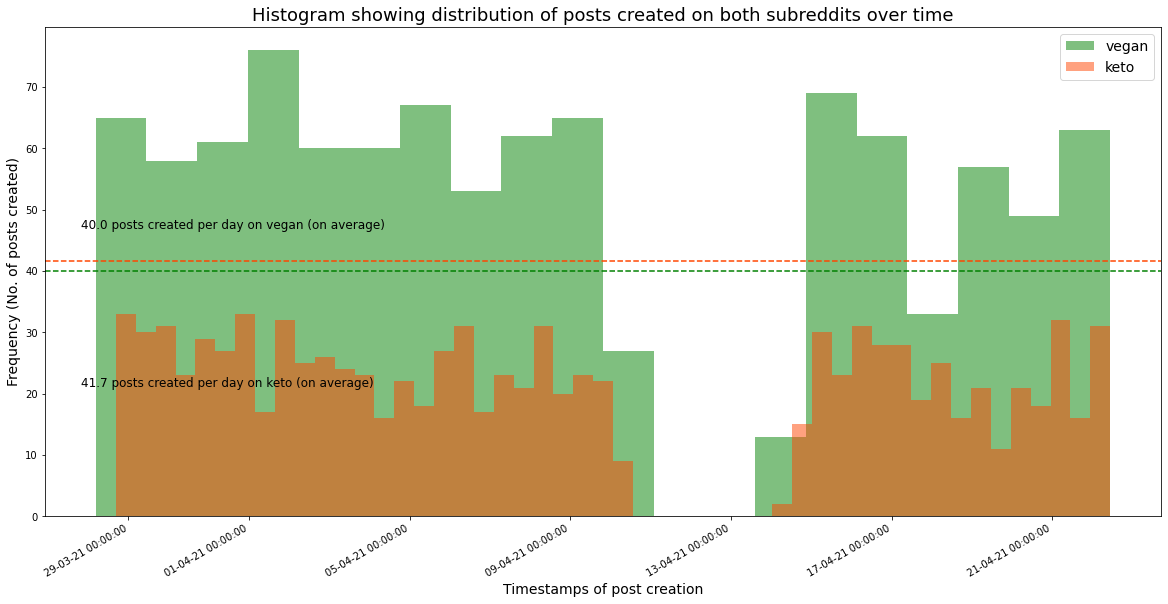

In [32]:
# Plotting histograms to show no. of posts created over time.

fig, ax = plt.subplots(figsize=(20,10))

plt.hist(vegan_scraped['created_utc'], bins=20, color='Green', alpha=0.5, label='vegan')
plt.hist(keto_scraped['created_utc'], bins=50, color='Orangered', alpha=0.5, label='keto')


# Plotting horizontal lines to show average no. of posts created per hour.
plt.axhline(vegan_avg_posts, ls='--', color='Green')
plt.figtext(x=0.15, y=0.6, s=f"{round(vegan_avg_posts, 1)} posts created per day on vegan (on average)", fontsize=12)

plt.axhline(keto_avg_posts, ls='--', color='Orangered')
plt.figtext(x=0.15, y=0.38, s=f"{round(keto_avg_posts, 1)} posts created per day on keto (on average)", fontsize=12)


# Setting format of timestamps on X-axis
# Code taken from https://matplotlib.org/3.1.1/gallery/text_labels_and_annotations/date.html
date_fmt = '%d-%m-%y %H:%M:%S'
date_formatter = mdate.DateFormatter(date_fmt)
ax.xaxis.set_major_formatter(date_formatter)
fig.autofmt_xdate()


plt.legend(fontsize=14)

plt.xlabel("Timestamps of post creation", fontsize=14)
plt.ylabel("Frequency (No. of posts created)", fontsize=14)

plt.title("Histogram showing distribution of posts created on both subreddits over time", loc='center', fontsize=18)

# Exporting plot image in PNG format.
plt.savefig('../plot_images/histogram_posts_over_time.png', bbox_inches='tight');

From the analysis above, ***by comparing the distribution of posts created on both subreddits over timethey, there are no significant difference btween the two subreddits and they are relatively similar.*** It lasts 25 days for 1000 posts from vegan compared to 24 days for 1000 posts from keto, and in average, subreddit vegan has an average of 40 posts per day in last 25 days compare to keto which only has an average of 41 posts per day in last 24 days.

## Classification Modeling

### Model Preparation

***Combining and shuffling the two subreddis***. 

In [33]:
#combine the two subreddits into one.
merged_data = pd.concat([vegan_scraped, keto_scraped], axis=0).reset_index(drop=True)

# Shuffling the rows of combined_df so as to mix together the rows coming from both subreddit datasets.
#drop=True prevents .reset_index from creating a column containing the old index entries.
merged_data = shuffle(merged_data).reset_index(drop=True)

# Creating the target variable for classification modeling (1 for r/relationship_advice & 0 for r/legal_advice).
merged_data['target'] = [0 if subreddit == 'vegan' else 1 for subreddit in merged_data['subreddit']]

print("Merging data's shape")
print(merged_data.shape)
print()
print("Checking for unbalanced classes")
# Checking for unbalanced classes.
print(merged_data['target'].value_counts(normalize=True))
print()
merged_data.head()



Merging data's shape
(2000, 15)

Checking for unbalanced classes
1    0.5
0    0.5
Name: target, dtype: float64



,subreddit,id,author,title,selftext,subreddit_subscribers,created_utc,created_time,length_of_time(sec),num_of_comments,score,text,post_length,text_cleaned,target
0,keto,mnjit3,losing4me,Question about calorie deficit,"5 weeks in on keto , I feel great and learned a lot here from this community. I’ve lost between 9-11 pounds so far. My appetite isn’t always that strong which is a good thing. I am wondering if it is ok to have a calorie deficit between 25-30%?\n\nAny input would be great.",2359216,2021-04-09 23:21:15,2021-04-09 23:21:15,1081969,17,1,"Question about calorie deficit 5 weeks in on keto , I feel great and learned a lot here from this community. I’ve lost between 9-11 pounds so far. My appetite isn’t always that strong which is a good thing. I am wondering if it is ok to have a calorie deficit between 25-30%?\n\nAny input would be great.",57,question calori deficit week feel great learn lot commun lost - pound far appetit alway strong good thing wonder ok calori deficit - input would great,1
1,keto,mmd18k,freddyt55555,Joseph's Heart Healthy Pita,"I just tried it for the first time, and it is amazing! It tastes way better than the keto bread that I've been buying from Costco. The only drawback is that it has 6g of carbs compared to the 0g net carbs of the keto bread. Although the pita didn't raise my postprandial blood glucose any higher than a typical lunch with the keto bread usually does, I'm now at around 17g of carbs for the day after only one meal, when I'm typically at around 10g.\n\nFor dinner, I now need to consume 60g of protein to hit my protein target but need to stay below 4g of carbs. I guess I'm going to have mix up couple glasses' worth of whey protein powder drink. LOL!",2357770,2021-04-08 05:57:30,2021-04-08 05:57:30,1230994,1,1,"Joseph's Heart Healthy Pita I just tried it for the first time, and it is amazing! It tastes way better than the keto bread that I've been buying from Costco. The only drawback is that it has 6g of carbs compared to the 0g net carbs of the keto bread. Although the pita didn't raise my postprandial blood glucose any higher than a typical lunch with the keto bread usually does, I'm now at around 17g of carbs for the day after only one meal, when I'm typically at around 10g.\n\nFor dinner, I now need to consume 60g of protein to hit my protein target but need to stay below 4g of carbs. I guess I'm going to have mix up couple glasses' worth of whey protein powder drink. LOL!",130,joseph heart healthi pita tri first time amaz tast way better bread buy costco drawback g carb compar g net carb bread although pita rais postprandi blood glucos higher typic lunch bread usual around g carb day one meal typic around g dinner need consum g protein hit protein target need stay g carb guess go mix coupl glass worth whey protein powder drink lol,1
2,vegan,mkacwe,EnjoyTheRide420,just finished Seaspiracy,"just wanted to say that I'm super bummed out. I knew what I was getting into before watching it, I just didn't realize the extent of our **emergency**. we truly are running out of time. the world is going to be such a lonely place without fellow animals....it's heartbreaking, to say the least. \n\nmaybe need a hug. or to be taken to a different planet, idk either one really.",585907,2021-04-05 10:10:28,2021-04-05 10:10:28,1474498,11,4,"just finished Seaspiracy just wanted to say that I'm super bummed out. I knew what I was getting into before watching it, I just didn't realize the extent of our **emergency**. we truly are running out of time. the world is going to be such a lonely place without fellow animals....it's heartbreaking, to say the least. \n\nmaybe need a hug. or to be taken to a different planet, idk either one really.",72,finish seaspiraci want say super bum knew get watch realiz extent emerg truli run time world go lone place without fellow anim heartbreak say least mayb need hug taken differ planet idk either one realli,0
3,vegan,mem3n7,Rainbowman1070,"I want to go vegan, but 

***Defining the classifier feature X and target variable y and splitting the features and target variable datasets into training and testing datasets with stratify=y.***

In [34]:
#Defining the classifier feature X and target variable y.
X = merged_data['text_cleaned']
y = merged_data['target']

#print(X[:5])
#print(y[:5])


In [35]:
# Splitting the features and target variable datasets into training and testing datasets with stratify=y. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y,random_state = 42)

# Baseline values
print("Baseline values:")
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

Baseline values:
1    0.5
0    0.5
Name: target, dtype: float64
1    0.5
0    0.5
Name: target, dtype: float64


The baseline values for both vegan and keto are evenly distributed since the data collected are even out

### Classification Metrics

The possible classification metrics that can be used to gauge how well the models perform are Accuracy, Misclassification Rate, Sensitivity (True Positive Rate), Specificity (True Negative Rate), Precision (Positive Predictive Value).

The final model will be chosen based on the performance comparison of the following models:
1. CountVectorizer with LogisticRegression
2. TfidfVectorizer with LogisticRegression
3. CountVectorizer with MultinomialNB
4. TfidfVectorizer with MultinomialNB

#### CountVectorizer with LogisticRegression

In [36]:
#create pipeline for 
pipe1 = Pipeline([('cvec1', CountVectorizer()),
                  ('logreg1', LogisticRegression())
                 ])
pipe1.get_params()

{'memory': None,
 'steps': [('cvec1', CountVectorizer()), ('logreg1', LogisticRegression())],
 'verbose': False,
 'cvec1': CountVectorizer(),
 'logreg1': LogisticRegression(),
 'cvec1__analyzer': 'word',
 'cvec1__binary': False,
 'cvec1__decode_error': 'strict',
 'cvec1__dtype': numpy.int64,
 'cvec1__encoding': 'utf-8',
 'cvec1__input': 'content',
 'cvec1__lowercase': True,
 'cvec1__max_df': 1.0,
 'cvec1__max_features': None,
 'cvec1__min_df': 1,
 'cvec1__ngram_range': (1, 1),
 'cvec1__preprocessor': None,
 'cvec1__stop_words': None,
 'cvec1__strip_accents': None,
 'cvec1__token_pattern': '(?u)\\b\\w\\w+\\b',
 'cvec1__tokenizer': None,
 'cvec1__vocabulary': None,
 'logreg1__C': 1.0,
 'logreg1__class_weight': None,
 'logreg1__dual': False,
 'logreg1__fit_intercept': True,
 'logreg1__intercept_scaling': 1,
 'logreg1__l1_ratio': None,
 'logreg1__max_iter': 100,
 'logreg1__multi_class': 'auto',
 'logreg1__n_jobs': None,
 'logreg1__penalty': 'l2',
 'logreg1__random_state': None,
 'logreg1__

In [37]:
# Establishing ranges of hyperparameters max_features, min_df, max_df & ngram_range for GridSearchCV.

pipe1_params = {'cvec1__max_features': [100, 200, 500, 800, 1000],
                'cvec1__min_df': [0.05, 0.10],
                'cvec1__max_df': [0.80, 0.90],
                'cvec1__ngram_range': [(1,1), (1,2)],
                'logreg1__random_state': [42],
               }

# Creating the GridSearchCV object for the Pipeline object with CountVectorizer transformer.
gs_pipe1 = GridSearchCV(pipe1, param_grid=pipe1_params, cv=5)
# Fitting GridSearchCV with CountVectorizer transformer on X_train and y_train.
gs_pipe1.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec1', CountVectorizer()),
                                       ('logreg1', LogisticRegression())]),
             param_grid={'cvec1__max_df': [0.8, 0.9],
                         'cvec1__max_features': [100, 200, 500, 800, 1000],
                         'cvec1__min_df': [0.05, 0.1],
                         'cvec1__ngram_range': [(1, 1), (1, 2)],
                         'logreg1__random_state': [42]})

In [38]:
# Best combination of hyperparameters suggested by GridSearchCV for CountVectorizer transformer.

gs_pipe1.best_params_

{'cvec1__max_df': 0.8,
 'cvec1__max_features': 500,
 'cvec1__min_df': 0.05,
 'cvec1__ngram_range': (1, 2),
 'logreg1__random_state': 42}

In [39]:
# Summary scores from GridSearchCV with CountVectorizer and LogisticRegression.

print("CountVectorizer with LogisticRegression summary of accuracy scores:")
print(f"GridSearchCV best accuracy = {round(gs_pipe1.best_score_, 3)}")
print("\nUsing GridSearchCV best params suggested,")
print(f"Training accuracy = {round(gs_pipe1.score(X_train, y_train), 3)}")
print(f"Testing accuracy = {round(gs_pipe1.score(X_test, y_test), 3)}")

CountVectorizer with LogisticRegression summary of accuracy scores:
GridSearchCV best accuracy = 0.885

Using GridSearchCV best params suggested,
Training accuracy = 0.958
Testing accuracy = 0.888


#### TfidfVectorizer with LogisticRegression

In [40]:
pipe2 = Pipeline([('tfvec2', TfidfVectorizer()),
                  ('logreg2', LogisticRegression())
                 ])
pipe2.get_params()

{'memory': None,
 'steps': [('tfvec2', TfidfVectorizer()), ('logreg2', LogisticRegression())],
 'verbose': False,
 'tfvec2': TfidfVectorizer(),
 'logreg2': LogisticRegression(),
 'tfvec2__analyzer': 'word',
 'tfvec2__binary': False,
 'tfvec2__decode_error': 'strict',
 'tfvec2__dtype': numpy.float64,
 'tfvec2__encoding': 'utf-8',
 'tfvec2__input': 'content',
 'tfvec2__lowercase': True,
 'tfvec2__max_df': 1.0,
 'tfvec2__max_features': None,
 'tfvec2__min_df': 1,
 'tfvec2__ngram_range': (1, 1),
 'tfvec2__norm': 'l2',
 'tfvec2__preprocessor': None,
 'tfvec2__smooth_idf': True,
 'tfvec2__stop_words': None,
 'tfvec2__strip_accents': None,
 'tfvec2__sublinear_tf': False,
 'tfvec2__token_pattern': '(?u)\\b\\w\\w+\\b',
 'tfvec2__tokenizer': None,
 'tfvec2__use_idf': True,
 'tfvec2__vocabulary': None,
 'logreg2__C': 1.0,
 'logreg2__class_weight': None,
 'logreg2__dual': False,
 'logreg2__fit_intercept': True,
 'logreg2__intercept_scaling': 1,
 'logreg2__l1_ratio': None,
 'logreg2__max_iter': 100

In [41]:
# Establishing ranges of hyperparameters max_features, min_df, max_df & ngram_range for GridSearchCV.
pipe2_params = {'tfvec2__max_features': [100, 200, 500, 800, 1000],
                'tfvec2__min_df': [0.05, 0.10],
                'tfvec2__max_df': [0.80, 0.90],
                'tfvec2__ngram_range': [(1,1), (1,2)],
                'logreg2__random_state': [42],
               }
# Creating the GridSearchCV object for the Pipeline object with TfidfVectorizer transformer.
gs_pipe2 = GridSearchCV(pipe2, param_grid=pipe2_params, cv=5)
# Fitting GridSearchCV with TfidfVectorizer transformer on X_train and y_train.
gs_pipe2.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfvec2', TfidfVectorizer()),
                                       ('logreg2', LogisticRegression())]),
             param_grid={'logreg2__random_state': [42],
                         'tfvec2__max_df': [0.8, 0.9],
                         'tfvec2__max_features': [100, 200, 500, 800, 1000],
                         'tfvec2__min_df': [0.05, 0.1],
                         'tfvec2__ngram_range': [(1, 1), (1, 2)]})

In [42]:
# Best combination of hyperparameters suggested by GridSearchCV for TfidfVectorizer transformer.

gs_pipe2.best_params_

{'logreg2__random_state': 42,
 'tfvec2__max_df': 0.8,
 'tfvec2__max_features': 500,
 'tfvec2__min_df': 0.05,
 'tfvec2__ngram_range': (1, 1)}

In [43]:
# Summary scores from GridSearchCV with TfidfVectorizer and LogisticRegression.

print("TfidfVectorizer with LogisticRegression summary of accuracy scores:")
print(f"GridSearchCV best accuracy = {round(gs_pipe2.best_score_, 3)}")
print("\nUsing GridSearchCV best params suggested,")
print(f"Training accuracy = {round(gs_pipe2.score(X_train, y_train), 3)}")
print(f"Testing accuracy = {round(gs_pipe2.score(X_test, y_test), 3)}")

TfidfVectorizer with LogisticRegression summary of accuracy scores:
GridSearchCV best accuracy = 0.901

Using GridSearchCV best params suggested,
Training accuracy = 0.931
Testing accuracy = 0.92


#### CountVectorizer with MultinomialNB

In [44]:
# Creating a Pipeline objects with CountVectorizer as transformer and MultinomialNB as estimator.

pipe3 = Pipeline([('cvec3', CountVectorizer()),
                  ('mnb3', MultinomialNB(fit_prior=True))
                 ])
pipe3.get_params()

{'memory': None,
 'steps': [('cvec3', CountVectorizer()), ('mnb3', MultinomialNB())],
 'verbose': False,
 'cvec3': CountVectorizer(),
 'mnb3': MultinomialNB(),
 'cvec3__analyzer': 'word',
 'cvec3__binary': False,
 'cvec3__decode_error': 'strict',
 'cvec3__dtype': numpy.int64,
 'cvec3__encoding': 'utf-8',
 'cvec3__input': 'content',
 'cvec3__lowercase': True,
 'cvec3__max_df': 1.0,
 'cvec3__max_features': None,
 'cvec3__min_df': 1,
 'cvec3__ngram_range': (1, 1),
 'cvec3__preprocessor': None,
 'cvec3__stop_words': None,
 'cvec3__strip_accents': None,
 'cvec3__token_pattern': '(?u)\\b\\w\\w+\\b',
 'cvec3__tokenizer': None,
 'cvec3__vocabulary': None,
 'mnb3__alpha': 1.0,
 'mnb3__class_prior': None,
 'mnb3__fit_prior': True}

In [45]:
# Establishing ranges of hyperparameters of CountVectorizer and MultinomialNB for GridSearchCV.

pipe3_params = {'cvec3__max_features': [500, 800, 1000],
                'cvec3__min_df': [0.02, 0.05,],
                'cvec3__max_df': [0.95, 0.98],
                'cvec3__ngram_range': [(1,1), (1,2)],
                'mnb3__alpha' : [1.0e-10, 0.5, 1],
               }
# Creating a GridSearchCV object for the Pipeline object defined above.
gs_pipe3 = GridSearchCV(pipe3, param_grid=pipe3_params, cv=5)

# Fitting GridSearchCV with CountVectorizer transformer and MultinomialNB estimator on X_train and y_train.
gs_pipe3.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec3', CountVectorizer()),
                                       ('mnb3', MultinomialNB())]),
             param_grid={'cvec3__max_df': [0.95, 0.98],
                         'cvec3__max_features': [500, 800, 1000],
                         'cvec3__min_df': [0.02, 0.05],
                         'cvec3__ngram_range': [(1, 1), (1, 2)],
                         'mnb3__alpha': [1e-10, 0.5, 1]})

In [46]:
# Best combination of hyperparameters suggested by GridSearchCV for CountVectorizer transformer.

gs_pipe3.best_params_

{'cvec3__max_df': 0.95,
 'cvec3__max_features': 500,
 'cvec3__min_df': 0.02,
 'cvec3__ngram_range': (1, 2),
 'mnb3__alpha': 1e-10}

In [47]:
# Summary scores from GridSearchCV with CountVectorizer and MultinomialNB.

print("CountVectorizer with MultinomialNB summary of accuracy scores:")
print(f"GridSearchCV best accuracy = {round(gs_pipe3.best_score_, 3)}")
print("\nUsing GridSearchCV best params suggested,")
print(f"Training corpus accuracy = {round(gs_pipe3.score(X_train, y_train), 3)}")
print(f"Testing corpus accuracy = {round(gs_pipe3.score(X_test, y_test), 3)}")

CountVectorizer with MultinomialNB summary of accuracy scores:
GridSearchCV best accuracy = 0.917

Using GridSearchCV best params suggested,
Training corpus accuracy = 0.925
Testing corpus accuracy = 0.918


#### TfidfVectorizer with MultinomialNB

In [48]:
# Creating a Pipeline objects with TfidfVectorizer as transformer and MultinomialNB as estimator.

pipe4 = Pipeline([('tfvec4', TfidfVectorizer()),
                  ('mnb4', MultinomialNB(fit_prior=True))
                 ])
pipe4.get_params()

{'memory': None,
 'steps': [('tfvec4', TfidfVectorizer()), ('mnb4', MultinomialNB())],
 'verbose': False,
 'tfvec4': TfidfVectorizer(),
 'mnb4': MultinomialNB(),
 'tfvec4__analyzer': 'word',
 'tfvec4__binary': False,
 'tfvec4__decode_error': 'strict',
 'tfvec4__dtype': numpy.float64,
 'tfvec4__encoding': 'utf-8',
 'tfvec4__input': 'content',
 'tfvec4__lowercase': True,
 'tfvec4__max_df': 1.0,
 'tfvec4__max_features': None,
 'tfvec4__min_df': 1,
 'tfvec4__ngram_range': (1, 1),
 'tfvec4__norm': 'l2',
 'tfvec4__preprocessor': None,
 'tfvec4__smooth_idf': True,
 'tfvec4__stop_words': None,
 'tfvec4__strip_accents': None,
 'tfvec4__sublinear_tf': False,
 'tfvec4__token_pattern': '(?u)\\b\\w\\w+\\b',
 'tfvec4__tokenizer': None,
 'tfvec4__use_idf': True,
 'tfvec4__vocabulary': None,
 'mnb4__alpha': 1.0,
 'mnb4__class_prior': None,
 'mnb4__fit_prior': True}

In [49]:
# Establishing ranges of hyperparameters of TfidfVectorizer and MultinomialNB for GridSearchCV.

pipe4_params = {'tfvec4__max_features': [500, 800, 1000],
                'tfvec4__min_df': [0.02, 0.05,],
                'tfvec4__max_df': [0.95, 0.98],
                'tfvec4__ngram_range': [(1,1), (1,2)],
                'mnb4__alpha' : [1.0e-10, 0.5, 1],
               }
# Creating a GridSearchCV object for the Pipeline object defined above.
gs_pipe4 = GridSearchCV(pipe4, param_grid=pipe4_params, cv=5)

# Fitting GridSearchCV with TfidfVectorizer transformer and MultinomialNB estimator on X_train and y_train.
gs_pipe4.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfvec4', TfidfVectorizer()),
                                       ('mnb4', MultinomialNB())]),
             param_grid={'mnb4__alpha': [1e-10, 0.5, 1],
                         'tfvec4__max_df': [0.95, 0.98],
                         'tfvec4__max_features': [500, 800, 1000],
                         'tfvec4__min_df': [0.02, 0.05],
                         'tfvec4__ngram_range': [(1, 1), (1, 2)]})

In [50]:
# Best combination of hyperparameters suggested by GridSearchCV for TfidfVectorizer transformer.

gs_pipe4.best_params_

{'mnb4__alpha': 1e-10,
 'tfvec4__max_df': 0.95,
 'tfvec4__max_features': 800,
 'tfvec4__min_df': 0.02,
 'tfvec4__ngram_range': (1, 2)}

In [51]:
# Summary scores from GridSearchCV with TfidfVectorizer and MultinomialNB.

print("TfidfVectorizer with MultinomialNB summary of accuracy scores:")
print(f"GridSearchCV best accuracy = {round(gs_pipe4.best_score_, 3)}")
print("\nUsing GridSearchCV best params suggested,")
print(f"Training corpus accuracy = {round(gs_pipe4.score(X_train, y_train), 3)}")
print(f"Testing corpus accuracy = {round(gs_pipe4.score(X_test, y_test), 3)}")

TfidfVectorizer with MultinomialNB summary of accuracy scores:
GridSearchCV best accuracy = 0.911

Using GridSearchCV best params suggested,
Training corpus accuracy = 0.927
Testing corpus accuracy = 0.916


#### Summary of CountVectorizer & TfidfVectorizer with LogisticRegression and MultinomialNB

In [52]:
# Creacting a summary dataframe.

summary_df = pd.DataFrame(columns=['Vect_Model', 
                                   'GSCV_best_params', 
                                   'GSCV_best_score', 
                                   'train_accuracy', 
                                   'test_accuracy'
                                  ])
summary_df.style.set_properties(**{'text-align': 'left'}).set_table_styles([ dict(selector='th', props=[('text-align', 'left')] ) ])
# Adding the accuracy scores from above two GridSearchCV models into summary_df.

summary_df.loc[1] = ['CountVec, LogReg',
                     'max_features= 500, min_df= 0.05, max_df= 0.8, ngram_range= (1,1)',
                     round(gs_pipe1.best_score_, 3),
                     round(gs_pipe1.score(X_train, y_train), 3),
                     round(gs_pipe1.score(X_test, y_test), 3)
                    ]

summary_df.loc[2] = ['TfidfVec, LogReg',
                     'max_features= 200, min_df= 0.05, max_df= 0.8, ngram_range= (1,2)',
                     round(gs_pipe2.best_score_, 3),
                     round(gs_pipe2.score(X_train, y_train), 3),
                     round(gs_pipe2.score(X_test, y_test), 3)
                    ]
summary_df.loc[3] = ['CountVec, MulNB',
                     'alpha= 1e-10, max_features= 800, min_df= 0.02, max_df= 0.95, ngram_range= (1,2)',
                     round(gs_pipe3.best_score_, 3),
                     round(gs_pipe3.score(X_train, y_train), 3),
                     round(gs_pipe3.score(X_test, y_test), 3)
                    ]
summary_df.loc[4] = ['TfidfVec, MulNB',
                     'alpha= 1e-10, max_features= 800, min_df= 0.02, max_df= 0.95, ngram_range= (1,2)',
                     round(gs_pipe4.best_score_, 3),
                     round(gs_pipe4.score(X_train, y_train), 3),
                     round(gs_pipe4.score(X_test, y_test), 3)
                    ]
summary_df

,Vect_Model,GSCV_best_params,GSCV_best_score,train_accuracy,test_accuracy
1,"CountVec, LogReg","max_features= 500, min_df= 0.05, max_df= 0.8, ngram_range= (1,1)",0.885,0.958,0.888
2,"TfidfVec, LogReg","max_features= 200, min_df= 0.05, max_df= 0.8, ngram_range= (1,2)",0.901,0.931,0.920
3,"CountVec, MulNB","alpha= 1e-10, max_features= 800, min_df= 0.02, max_df= 0.95, ngram_range= (1,2)",0.917,0.925,0.918
4,"TfidfVec, MulNB","alpha= 1e-10, max_features= 800, min_df= 0.02, max_df= 0.95, ngram_range= (1,2)",0.911,0.927,0.916


From the summary above, it can be observed that both the *MultinomialNB CountVectorizer* model and the *MultinomialNB TfidfVectorizer* model can achieve the similar result in terms of best score. 

However, **the *MultinomialNB with CountVectorizer* model performs slightly better** in terms of generalization, as it has a smaller difference in the accuracy score from the training score to the testing score. Hence, the ***MultinomialNB with CountVectorizer*** is chosen as the final model to use.

### Final Classification Modelling and Evaluation

In [53]:
# Recalling the best combination of hyperparameters for MultinomialNB with CountVectorizer suggested by GridSearchCV above.

gs_pipe3.best_params_

{'cvec3__max_df': 0.95,
 'cvec3__max_features': 500,
 'cvec3__min_df': 0.02,
 'cvec3__ngram_range': (1, 2),
 'mnb3__alpha': 1e-10}

In [54]:
# Creating a TfidfVectorizer object with best params suggested above.

ctvec_final = CountVectorizer(max_features=500, min_df=0.02, max_df=0.95, ngram_range=(1, 2))

In [55]:
# Fitting and transforming X_train into a sparse matrix using the TfidfVectorizer object defined above.

X_train_ctvec = ctvec_final.fit_transform(X_train)

In [56]:
# Converting the sparse matrix to pandas DataFrame so as to visualize it.

X_train_ctvec_df = pd.DataFrame(X_train_ctvec.toarray(), columns=ctvec_final.get_feature_names())

In [57]:
X_train_ctvec_df

,abl,absolut,activ,actual,ad,add,advanc,advic,ago,almost,...,would,would like,would love,wrong,www,www reddit,year,year ago,yesterday,yet
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,4,0,0,1,0,0,0,...,5,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1496,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
1497,0,0,0,0,0,1,0,0,0,0,...,2,0,0,0,0,0,2,0,0,0
1498,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [58]:
# Transforming X_test into a sparse matrix using the TfidfVectorizer object defined above.

X_test_ctvec = ctvec_final.transform(X_test)

In [59]:
# Converting the sparse matrix to pandas DataFrame so as to visualize it.

X_test_ctvec_df = pd.DataFrame(X_test_ctvec.toarray(), columns=ctvec_final.get_feature_names())

In [60]:
X_test_ctvec_df

,abl,absolut,activ,actual,ad,add,advanc,advic,ago,almost,...,would,would like,would love,wrong,www,www reddit,year,year ago,yesterday,yet
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,3,0,0,0,0,0,0,0,0,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
496,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
497,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,3,0,0,1
498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
# Creating a MultinomialNB object with best params suggested above.

ct_mnb_final = MultinomialNB(alpha=0.5, fit_prior=True)

In [62]:
# Fitting the final model on X_train_tfvec sparse matrix and y_train.

ct_mnb_final.fit(X_train_ctvec, y_train)

MultinomialNB(alpha=0.5)

In [63]:
# Accuracy score on training corpus.

ct_mnb_final.score(X_train_ctvec, y_train)

0.924

In [64]:
# 5 fold cross-validated accuracy score on training corpus, ie. ESTIMATED accuracy score on testing corpus.

cross_val_score(ct_mnb_final, X_train_ctvec, y_train, cv=5).mean()

0.9153333333333332

In [65]:
# ACTUAL accuracy score on testing corpus.

ct_mnb_final.score(X_test_ctvec, y_test)

0.916

In [66]:
# Generating predictions for the testing corpus.

y_pred = ct_mnb_final.predict(X_test_ctvec)

In [67]:
# Generating predictions for the testing corpus.

y_pred_proba = ct_mnb_final.predict_proba(X_test_ctvec)

In [68]:
# Generating a confusion matrix to analyse the degree of skewness in classification towards a particular subreddit.

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [69]:
# Putting the above in a dataframe for easier visualization and understanding.

confusion_matrix = pd.DataFrame(columns=['Actual vegan', 'Actual keto'], 
                        index=['Predicted vegan', 'Predicted keto'],
                        data=[[f'{tp} (True Pos)', f'{fp} (False Pos)'], [f'{fn} (False Neg)', f'{tn} (True Neg)']]
                       )

In [70]:
confusion_matrix

,Actual vegan,Actual keto
Predicted vegan,218 (True Pos),10 (False Pos)
Predicted keto,32 (False Neg),240 (True Neg)


In [71]:
# Calculating the Sensitivity, ie. True Positive Rate

sensitivity = tp/(tp+fn)
sensitivity

0.872

In [72]:
# Calculating the Specificity, ie. True Negative Rate

specificity = tn/(tn+fp)
specificity

0.96

In [73]:
# Calculating the ROC AUC score.

roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
roc_auc

0.9778159999999998

In [74]:
# Creating a dataframe of actual values from y_test and of predicted probabilities of positive class from y_pred_proba.

pred_df = pd.DataFrame({'true_values' : y_test,
                        'pred_probs' : y_pred_proba[:, 1]
                       })
pred_df.head(10)

,true_values,pred_probs
710,1,9.999641e-01
1323,0,3.033491e-02
1560,1,1.000000e+00
1310,0,4.396899e-93
327,1,9.895279e-01
1004,0,4.498918e-08
1152,0,4.035000e-07
1186,1,9.999999e-01
1682,0,6.024489e-03
212,0,3.818793e-17


In [75]:
# Creating threshold values 
thresholds = np.linspace(0, 1, 200)

# Defining a function to calculate Sensitivity (True Positive Rate).
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)

# Defining a function to calculate 1 - Specificity (1 - True Negative Rate).
def TNR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
    
# Calculating Sensitivity & 1 - Specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
tnr_values = [TNR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]


In [76]:
# Accessing the empirical probabilities of all features (tokens) using the .feature_log_prob_ attribute of MultinomialNB,
# and then calculating its exponential using the np.exp() function.

neg_class_prob = np.exp(ct_mnb_final.feature_log_prob_)[0]
pos_class_prob = np.exp(ct_mnb_final.feature_log_prob_)[1]

neg_class_prob

array([1.40716946e-03, 8.10188475e-04, 1.57773545e-03, 2.25999943e-03,
       9.23899139e-04, 1.29345879e-03, 8.38616141e-04, 2.00415044e-03,
       2.28842710e-03, 1.66301845e-03, 1.89043978e-03, 6.63785997e-03,
       1.63459078e-03, 2.74326975e-03, 8.67043807e-04, 1.17974813e-03,
       1.80373540e-02, 2.57270376e-03, 1.35031413e-03, 6.68050146e-04,
       7.53333144e-04, 4.87534469e-03, 7.53333144e-04, 2.20314410e-03,
       1.46402479e-03, 1.26503113e-03, 1.43559712e-03, 1.71987378e-03,
       2.68641442e-03, 7.81760810e-04, 3.51081673e-03, 1.17974813e-03,
       6.96477812e-04, 1.23660346e-03, 1.23660346e-03, 2.51584842e-03,
       2.23157177e-03, 4.12201154e-04, 2.91383574e-03, 1.23660346e-03,
       1.91886744e-03, 5.54339483e-04, 1.46402479e-03, 6.11194815e-04,
       2.91383574e-03, 2.74326975e-03, 9.80754470e-04, 1.66301845e-03,
       1.26503113e-03, 1.17974813e-03, 6.39622481e-04, 1.43559712e-03,
       5.54339483e-04, 5.25911817e-04, 1.09446513e-03, 7.24905478e-04,
      

In [77]:
# Sorting the indexes of probabilities from above using the np.argsort() function.
# np.argsort() returns an array of indexes of probabilities from above sorted in an ascending order (feature with lowest probability first).

neg_class_prob_sorted = neg_class_prob.argsort()
pos_class_prob_sorted = pos_class_prob.argsort()

neg_class_prob_sorted

array([307, 234, 233, 118, 268, 145, 306, 212, 219, 220,  97, 443, 479,
       272, 477,  64, 176, 397, 275, 183, 303, 346, 265, 235, 454, 110,
       353,  82, 224, 228, 231, 419, 498, 382, 266, 148, 273, 277, 336,
       243, 139, 444, 476,  37, 378, 131, 121, 216, 136, 159, 470, 172,
       300, 377, 264, 386, 387, 358, 179, 132, 310, 288, 195, 267, 262,
        75, 372, 209, 335, 168, 178, 221, 260, 240, 410,  60, 458,  53,
        92, 205, 390, 253,  52, 429,  41, 161, 311,  86, 438, 171, 316,
       242, 185, 105,  43, 417, 298, 279, 294,  50, 321, 280,  19, 451,
        32, 149, 170, 115, 181, 297, 404, 154, 497,  89, 137,  55,  69,
       453, 388, 452, 299,  22,  20, 102, 369, 289, 392,  29, 271,  65,
       135, 249, 189, 489,  87, 373, 103, 214,  68,   1, 393, 295, 421,
         6, 430, 142, 155, 274, 241, 347, 320, 408, 246, 435, 482,  14,
       436, 227, 199, 399, 396, 125, 318, 146, 314, 406,  79, 414,  62,
       423,  58, 124, 187, 186, 446, 157, 428,  99, 394, 426,   

In [78]:
# Accessing the LAST 30 elements from the neg_class_prob_sorted array above.
# As explained above, the numbers in this array below correspond to the indexes of 30 features (tokens) which have the HIGHEST probabilities,
# ie., 30 most important features, in the negative class (r/legaladvice).

neg_class_prob_sorted[::-1][:30]

array([113,  16, 252, 490, 287, 463, 334, 471, 177, 174, 163, 278, 151,
       238, 211, 324, 362, 440, 496, 455, 445, 461,  11, 305, 128, 352,
       439, 381, 302, 201], dtype=int64)

In [79]:
# Getting the corresponding feature (tokens) from the .get_feature_names() method of TfidfVectorizer.

neg_class_top_features = np.take(ctvec_final.get_feature_names(), neg_class_prob_sorted[::-1][:30])
pos_class_top_features = np.take(ctvec_final.get_feature_names(), pos_class_prob_sorted[::-1][:30])

In [80]:
# 30 most important features from positive class (r/vegan).

pos_class_top_features

array(['day', 'carb', 'eat', 'weight', 'like', 'get', 'start', 'week',
       'diet', 'time', 'go', 'feel', 'lb', 'would', 'fat', 'tri', 'month',
       'year', 'want', 'food', 'know', 'work', 'realli', 'much', 'lost',
       'help', 'back', 'lose', 'calori', 'fast'], dtype='<U12')

In [81]:
# 30 most important features from positive class (r/keto).

neg_class_top_features

array(['eat', 'anim', 'like', 'would', 'meat', 'vegan', 'peopl', 'want',
       'go', 'get', 'food', 'make', 'feel', 'know', 'http', 'one',
       'realli', 'think', 'year', 'tri', 'time', 'use', 'also', 'need',
       'even', 'product', 'thing', 'say', 'much', 'help'], dtype='<U12')

- Filtering the corresponding probabilities from the probabilities lists defined above to visualize the top features on a graph plot

In [82]:
# Getting the corresponding probabilities of top 30 features (tokens) from the neg_class_prob & pos_class_prob arrays defined above.

neg_class_top_features_prob = np.take(neg_class_prob, neg_class_prob_sorted[::-1][:30])
pos_class_top_features_prob = np.take(pos_class_prob, pos_class_prob_sorted[::-1][:30])

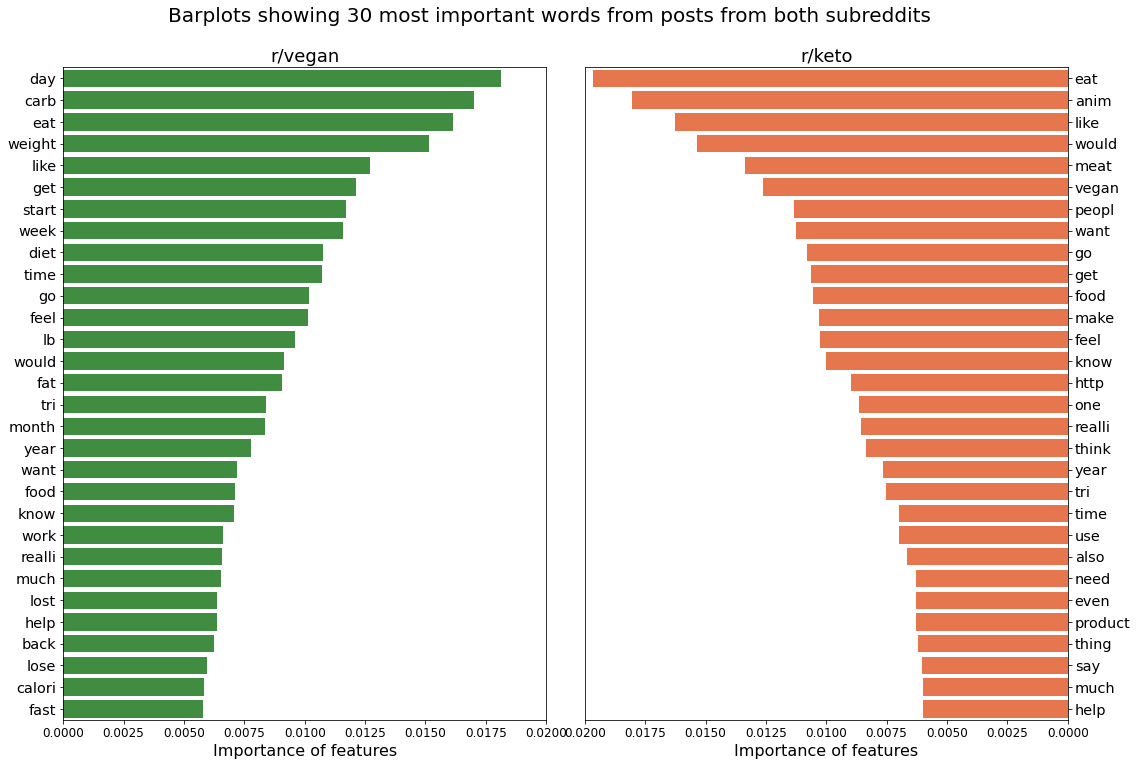

In [83]:
# Plotting barplots to visualise the most important features (tokens) along with their probabilities.

fig, ax = plt.subplots(figsize=(18,12), ncols=2)

# Reducing space between the two subplots.
plt.subplots_adjust(wspace=0.08)

ax = ax.ravel()

# Plotting horizontal barplots.
sns.barplot(orient='h', y=pos_class_top_features, x=pos_class_top_features_prob, ax=ax[0], color='Green', alpha=0.8)
sns.barplot(orient='h', y=neg_class_top_features, x=neg_class_top_features_prob, ax=ax[1], color='Orangered', alpha=0.8)

# Setting the x-axis limits to be the same on both subplots.
ax[0].set(xlim=(0, round(pos_class_top_features_prob[0]*1.1, 3)))
ax[1].set(xlim=(0, round(pos_class_top_features_prob[0]*1.1, 3)))

# Inverting the x-axis and moving the y-axis labels to the right for subplot on the right.
ax[1].invert_xaxis()
ax[1].yaxis.tick_right()

# Setting the size of axis ticks.
ax[0].tick_params(axis='x', labelsize=12)
ax[1].tick_params(axis='x', labelsize=12)
ax[0].tick_params(axis='y', labelsize=14.5)
ax[1].tick_params(axis='y', labelsize=14.5)


ax[0].set_xlabel("Importance of features", fontsize=16)
ax[1].set_xlabel("Importance of features", fontsize=16)

ax[0].set_title('r/vegan', fontsize=18)
ax[1].set_title('r/keto', fontsize=18)

fig.suptitle(x=0.5, y=0.95, t="Barplots showing 30 most important words from posts from both subreddits", fontsize=20)

# Exporting plot image in PNG format.
plt.savefig('../plot_images/barplot_most_important_words.png', bbox_inches='tight');

In [84]:
# Summarizing all above results.

print("Summary of final model (MultinomialNB with CountVectorizer):")
print(f"Training set accuracy \t\t\t= {round(ct_mnb_final.score(X_train_ctvec, y_train)*100, 1)}%")
print(f"Estimated test set accuracy (cv=5) \t= {round(cross_val_score(ct_mnb_final, X_train_ctvec, y_train, cv=5).mean()*100, 1)}%")
print(f"Actual test set accuracy \t\t= {round(ct_mnb_final.score(X_test_ctvec, y_test)*100, 1)}%")
print(f"Sensitivity (True Positive Rate) \t= {round(sensitivity*100, 1)}%")
print(f"Specificity (True Negitive Rate) \t= {round(specificity*100, 1)}%")
print(f"Total Misclassified Posts \t\t= {fp+fn} out of 500")
confusion_matrix

Summary of final model (MultinomialNB with CountVectorizer):
Training set accuracy 			= 92.4%
Estimated test set accuracy (cv=5) 	= 91.5%
Actual test set accuracy 		= 91.6%
Sensitivity (True Positive Rate) 	= 87.2%
Specificity (True Negitive Rate) 	= 96.0%
ROC AUC 				= 0.978
Total Misclassified Posts 		= 42 out of 500


,Actual vegan,Actual keto
Predicted vegan,218 (True Pos),10 (False Pos)
Predicted keto,32 (False Neg),240 (True Neg)


## Conclusion

It was observed from the evaluation metrics that **the *MultinomialNB* model with *CountVectorizer* has a very high classification accuracy on the testing score**. 

Looking at the *Sensitivity* and *Specificity*, and the numbers of false positives and false negatives, it can be seen that the subreddits vegan and keto are classified properly that only a few posts are mis-classifed. In general, both subreddits have similar posting rate per day and simlar length of per post, but **the subscribers and comments for keto are higher than vegan**, this indicates that more people are interested in keto than vegan as a trend.

Also, those who are into vegan diets are confident and have stable views about this whilst there is more curiosity and arguments about keto diets.


## Recommmendations

It would be recommended to review on the misclassified posts keywords prior to postings in vegan forum and to possibly increase the breath of the timeline of the data collected to capture more insights of different subreddits.